In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import poisson

# Ciencia de redes

# Red de aeropuertos
## Datos

Descripción de los datos

Los nodos representan aeropuertos y los enlaces nos indican si hubo un vuelo comercial entre ellos.

Origen o método de obtención de los datos

Los datos se obtuvieron del repositorio Netzschleuder. Enlace https://networks.skewed.de/net/openflights

##Cita: "The openflights.org website.", https://openflights.org/

In [ ]:
df1 = pd.read_csv('/content/edges.csv')

In [ ]:
df1

,# source,target,distance,airline,airline_code,codeshare,equipment,stops
0,0,2,124.520121,CG,1308,0,DH8 DHT,0
1,0,3,157.150822,CG,1308,0,DH8,0
2,0,1,106.747399,CG,1308,0,DH8,0
3,0,4,424.726096,CG,1308,0,DH8,0
4,0,4,424.726096,PX,328,0,DH4 DH8 DH3,0
...,...,...,...,...,...,...,...,...
66766,3211,2767,1217.384762,KN,10741,0,737,0
66767,3211,2840,375.021414,MU,1758,1,737,0
66768,3211,2767,1217.384762,MU,1758,1,737,0
66769,3212,1675,425.533589,GS,690,0,E90,0


In [ ]:
df2 = pd.read_csv('/content/nodes.csv', index_col = "# index")

In [ ]:
df2

,id,name,city,country,IATA/FAA,ICAO,latitude,longitude,altitude,timezone,DST,_pos
# index,,,,,,,,,,,,
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,"array([6.29268027, 1.37900375])"
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,"array([6.30735453, 1.39906658])"
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,"array([6.3014785 , 1.38535133])"
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,"array([6.27849235, 1.39511825])"
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,"array([6.23308524, 1.34013967])"
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,11290,Kongolo Airport,Kongolo,Congo (Kinshasa),KOO,FZRQ,-5.394440,26.990000,1850,1.0,U,"array([5.5164688 , 1.37876336])"
3210,11436,Tarko-Sale Airport,Tarko-Sale,Russia,TQL,USDS,64.930801,77.818100,82,5.0,U,"array([5.87627232, 1.43157964])"
3211,11473,Jinchuan Airport,Jinchuan,China,JIC,ZLJC,38.542222,102.348333,4740,8.0,U,"array([6.169881 , 1.28830756])"


Se genera la red.

In [ ]:
G = nx.from_pandas_edgelist(df1, source = "# source", target = " target" )

Se buscan autoenlaces

In [ ]:
for mm, mmm in G.edges:
  if mm == mmm:
    print(mm)

1931


Se elimina el único autoenlace

In [ ]:
G.remove_edge(1931, 1931)

En esto nos deja con un número de enlaces de:

In [ ]:
len(G.edges)

18858

Y con un número de nodos de:

In [ ]:
len(G.nodes)

3214

## Propiedades de la red
### Propiedades generales de la red

La red es no conectada

In [ ]:
nx.is_connected(G)

False

Las componentes de la red son:

In [ ]:
for componente in nx.connected_components(G):
  print(componente)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
a = []

for componente in nx.connected_components(G):
  a.append(componente)

In [ ]:
amax = max(a,key = len)

Se trabaja con la máxima componente

In [ ]:
G = nx.subgraph(G, amax)

In [ ]:
distancia_promedio = nx.average_shortest_path_length(nx.subgraph(G, componente)  )

In [ ]:
diametro  =nx.diameter(nx.subgraph(G, componente)  )

In [ ]:
N*(N-1)/2

5080078.0

In [ ]:
N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)

p = k / (N-1)
print('Propiedades generales de la red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)

print(" El diametro de la red es:", diametro)
print("La distancia promedio es:", distancia_promedio)

Propiedades generales de la red:
- El número de nodos es:	 3188
- El número de enlaces es:	 18833
- El grado promedio es:		 11.814930991217064


El coeficiente de clustering promedio de la red es:
 0.4928300852568967
 El diametro de la red es: 12
La distancia promedio es: 3.9585303611479983


### Gráfica de medidas de centralidad


In [ ]:
diccionario_degree = nx.degree_centrality(G)
Valores_Degree = np.array([diccionario_degree[i] for i in G])

diccionario_closeness = nx.closeness_centrality(G)
Valores_Closeness = np.array([diccionario_closeness[i] for i in G])

In [ ]:
Ejex = list(G.nodes)

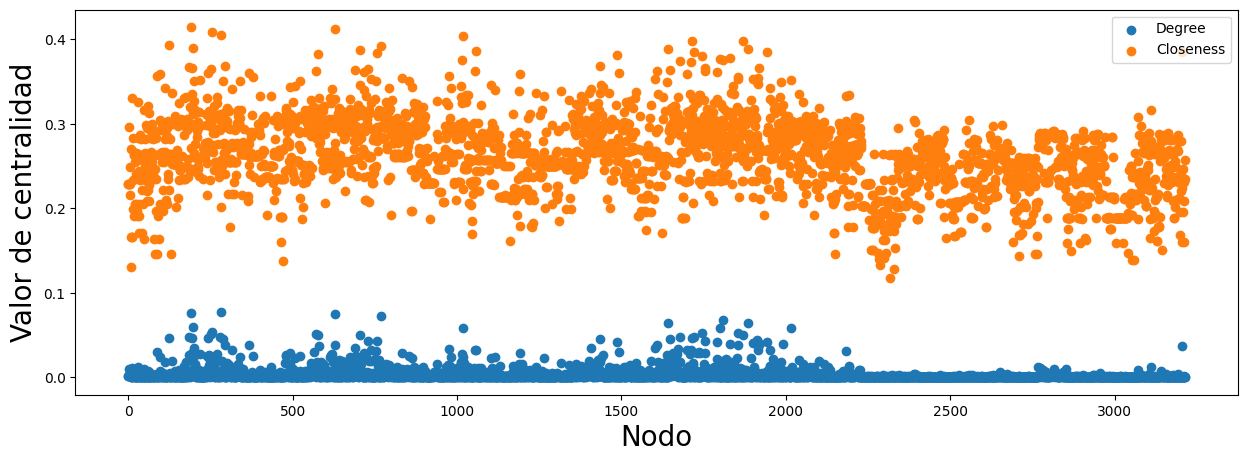

In [ ]:
plt.figure(figsize = [15, 5])
plt.scatter(Ejex, Valores_Degree, label = 'Degree')
plt.scatter(Ejex, Valores_Closeness, label = 'Closeness')

plt.legend()

plt.xlabel('Nodo', size = 20)
plt.ylabel('Valor de centralidad', size = 20)

plt.show()

### Visualización de un subconjunto de la red

In [ ]:
nodos = list(G.nodes)

In [ ]:
H = nx.subgraph(G, nodos[0:1000])

In [ ]:
pos = nx.kamada_kawai_layout(H)

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)

In [ ]:
tamaños = np.array( [ H.degree(nodo) for nodo in H ] )

In [ ]:
ColorL = []
color = nx.closeness_centrality(H)

for nodo in H:
  ColorL.append(color[nodo])

In [ ]:
dic1 = {}
for nodo in H.nodes:
  dic1[nodo] = [df2[" longitude"][nodo], df2[" latitude"][nodo]]

Visualización parcial

Subconjunto de la red (mil nodos) en la que dos propiedades de los nodos (grado y centralidad de cercanía) se codifican con el color y el tamaño de los nodos.

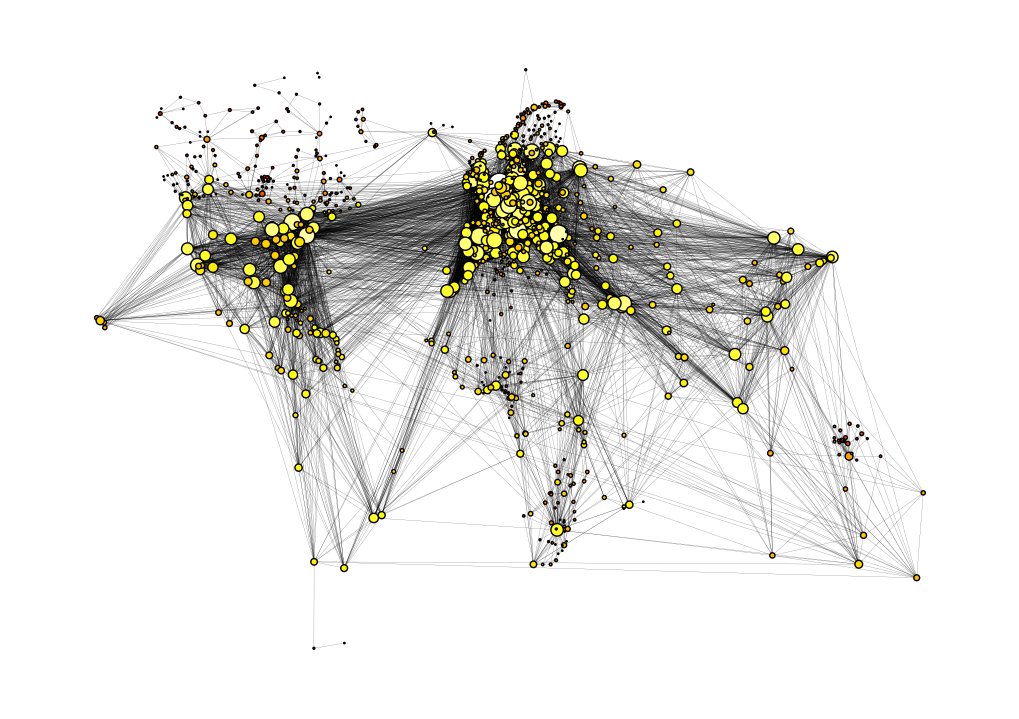

In [ ]:
nx.draw(H, pos = dic1, node_size = tamaños, edgecolors = "k", node_color = ColorL, cmap = "hot", width = 0.1)

Visualización completa

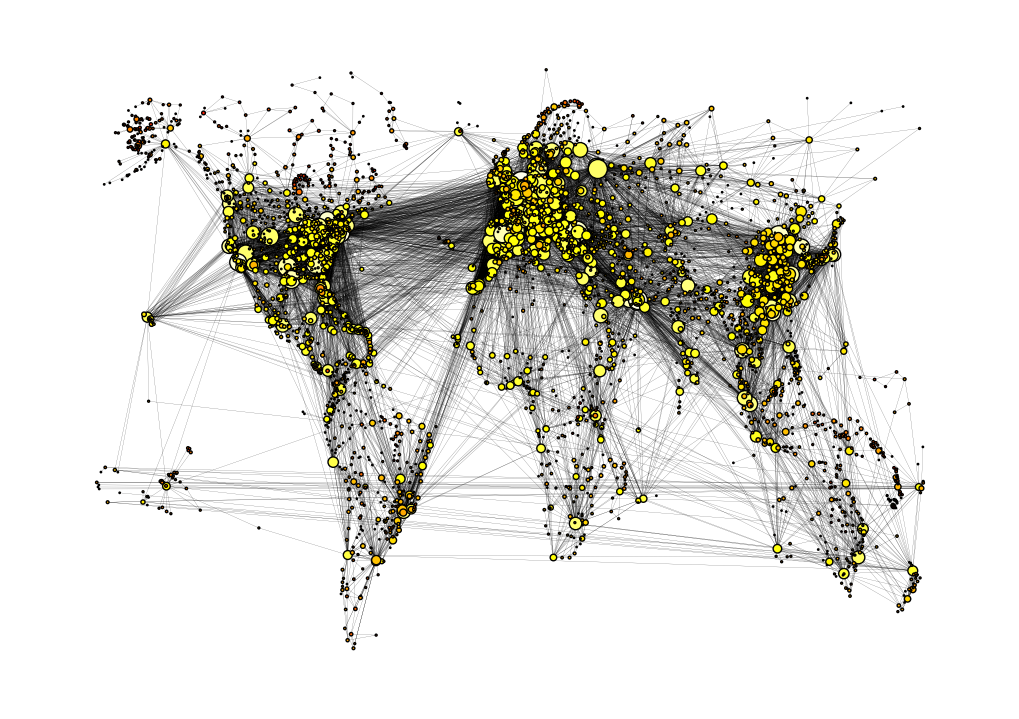

In [ ]:
nx.draw(G, pos = dic1, node_size = tamaños, edgecolors = "k", node_color = ColorL, cmap = "hot", width = 0.1)#, with_labels = 1)

### Distribución de grado
Se elige convenientemente las escalas de los nodos

In [ ]:
df.Degree.max()

248.0

In [ ]:
df[df["Degree"] == 248]

,Degree,Clustering
282,248.0,0.148328


In [ ]:
df2.loc[282]

 id                                       580
 name              Amsterdam Airport Schiphol
 city                               Amsterdam
 country                          Netherlands
 IATA/FAA                                 AMS
 ICAO                                    EHAM
 latitude                           52.308601
 longitude                            4.76389
 altitude                                 -11
 timezone                                 1.0
 DST                                        E
 _pos         array([5.99996162, 1.16850488])
Name: 282, dtype: object

In [ ]:
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)

df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']
df

,Degree,Clustering
0,4.0,1.000000
2,9.0,0.388889
3,9.0,0.388889
1,7.0,0.571429
4,32.0,0.125000
...,...,...
3057,1.0,0.000000
3129,2.0,0.000000
3127,1.0,0.000000
3180,2.0,1.000000


In [ ]:
df.Degree.values
K = df.Degree.max()
y,x = np.histogram(df.Degree.values, bins = range(int(K)+1), density= True)

In [ ]:
K = df.Degree.max()

Text(0, 0.5, 'P(k)')

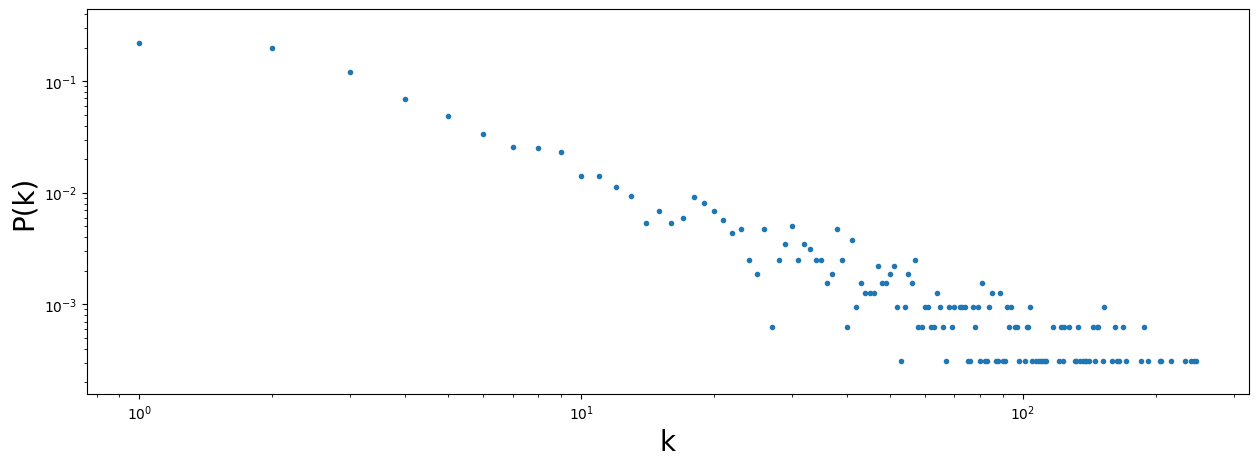

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.')

plt.xscale('log')
plt.yscale('log')

plt.ylim([0.5*y[y>0].min(),2*y.max()])

plt.xlabel('k', size = 20)
plt.ylabel('P(k)', size = 20)

Text(0, 0.5, 'P(k)')

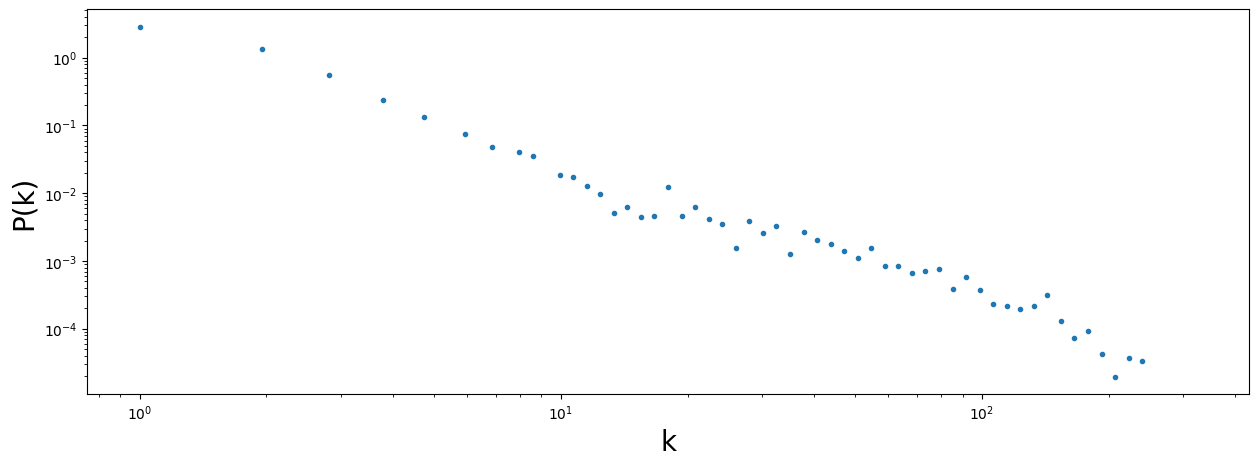

In [ ]:
y1,x1 = np.histogram(df.Degree.values, bins = np.logspace(0, np.log10(int(K)+100), 80), density= 1)

plt.figure(figsize = [15,5])
plt.plot(x1[:-1], y1, '.')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('k', size = 20)
plt.ylabel('P(k)', size = 20)

### Interpretación

La red es escasa L << Lmax, tiene propiedad de mundo pequeño: distancia promedio = 3.95, pedominan los nodos con grado bajo y tiene un clustering promedio alto: 0.49.

In [ ]:
print('Propiedades generales de la red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- Maximo número de enlaces es:\t', N*(N-1)/2)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)

print(" El diametro de la red es:", diametro)
print("La distancia promedio es:", distancia_promedio)

Propiedades generales de la red:
- El número de nodos es:	 3188
- El número de enlaces es:	 18833
- Maximo número de enlaces es:	 5080078.0
- El grado promedio es:		 11.814930991217064


El coeficiente de clustering promedio de la red es:
 0.4928300852568967
 El diametro de la red es: 12
La distancia promedio es: 3.9585303611479983


## Comparación con modelos
### Modelo de red aleatoria G(N,p)

Comparación de distribución de grado con red aleatoria correspondiente.

In [ ]:
X, Y = df.groupby('Degree')['Clustering'].mean().reset_index().values.T

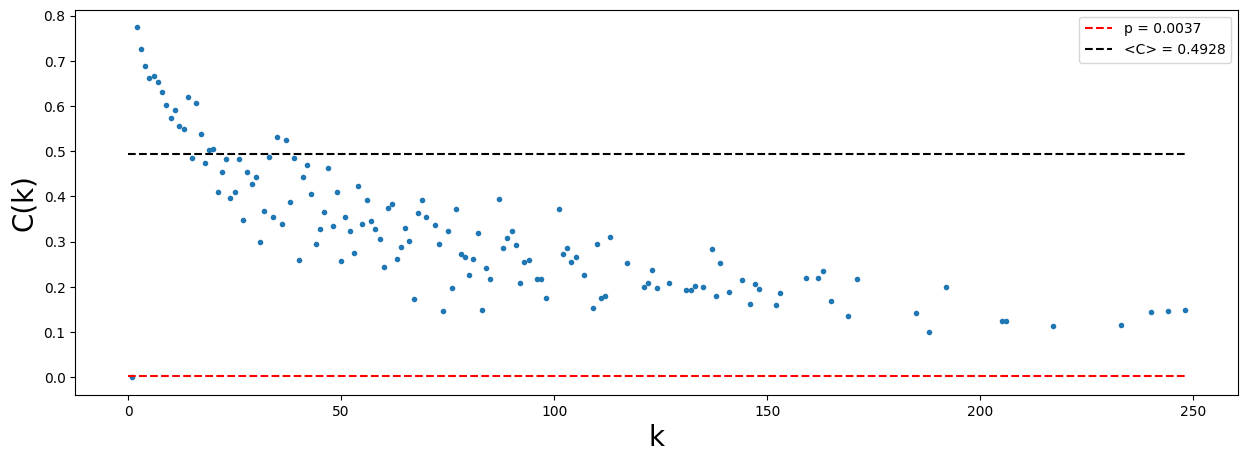

In [ ]:
plt.figure(figsize=[15,5])
plt.plot(X, Y, '.')

plt.plot([0,K], [p,p], 'r--', label = 'p = %.4f' %p)
plt.plot([0,K], [C,C], 'k--', label = '<C> = %.4f' %C)

plt.xlabel('k', size = 20)
plt.ylabel('C(k)', size = 20)
plt.legend()

Text(0.5, 0, 'k')

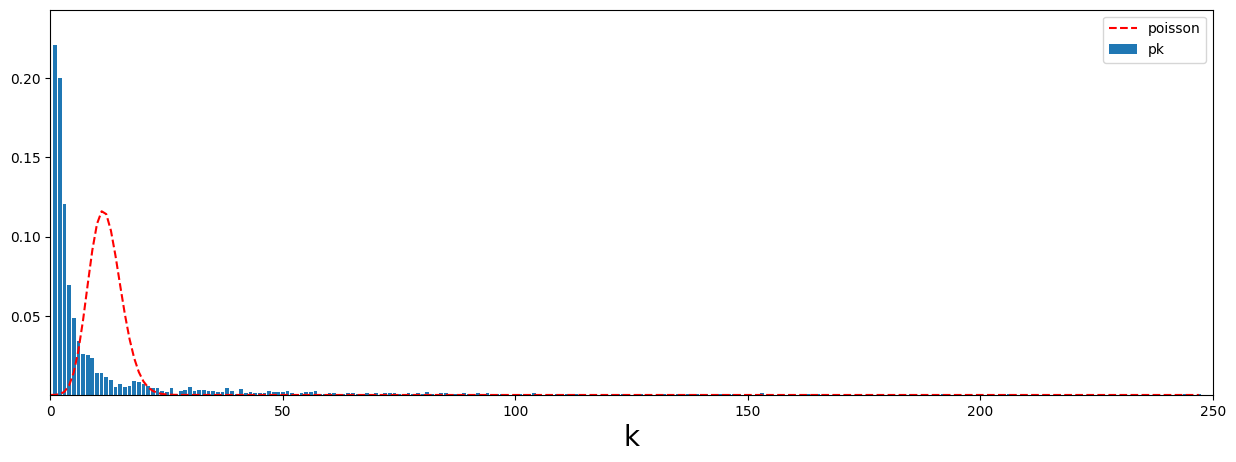

In [ ]:
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0, 250])
plt.legend()

plt.xlabel('k', size = 20)

[]

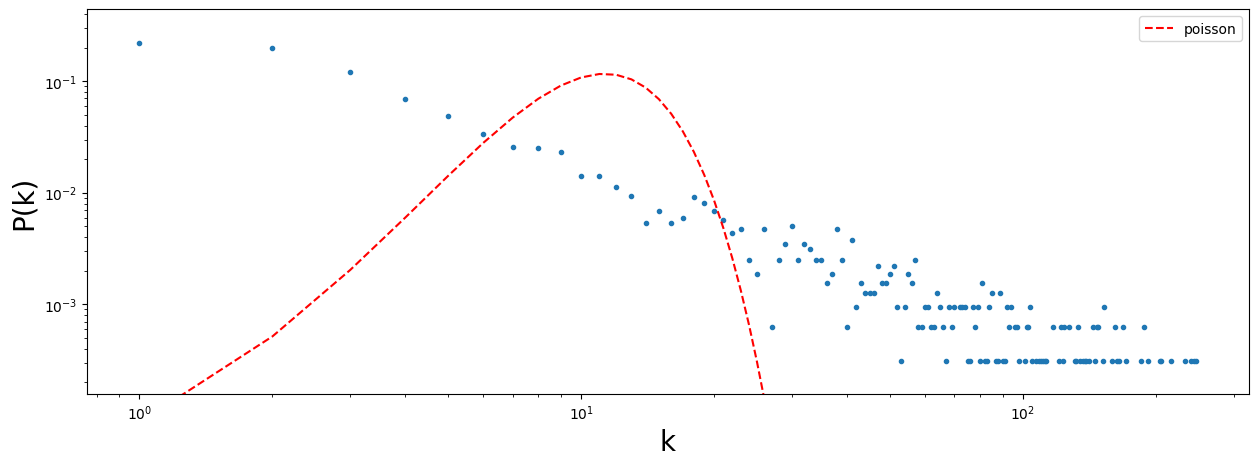

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

#Se aplica escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

#parámetros adecuados para la visualización:
plt.ylim([0.5*y[y>0].min(),2*y.max()])

plt.xlabel('k', size = 20)
plt.ylabel('P(k)', size = 20)

plt.legend()

plt.plot()

El modelo de red aleatoria no ajusta en este caso.

El modelo de red aleatoria subestima el grado maximo que los nodos (aeropuertos) pueden tener.

### Red con independencia de escala
A partir de la distribución de grado, se encuentra el exponenete de la ley de potencia que mejor se ajusta.

In [ ]:
! pip install powerlaw

import powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fit = powerlaw.Fit(df.Degree.values)

Calculating best minimal value for power law fit


In [ ]:
fit.alpha

1.8633845593749108

Text(0, 0.5, 'P(k)')

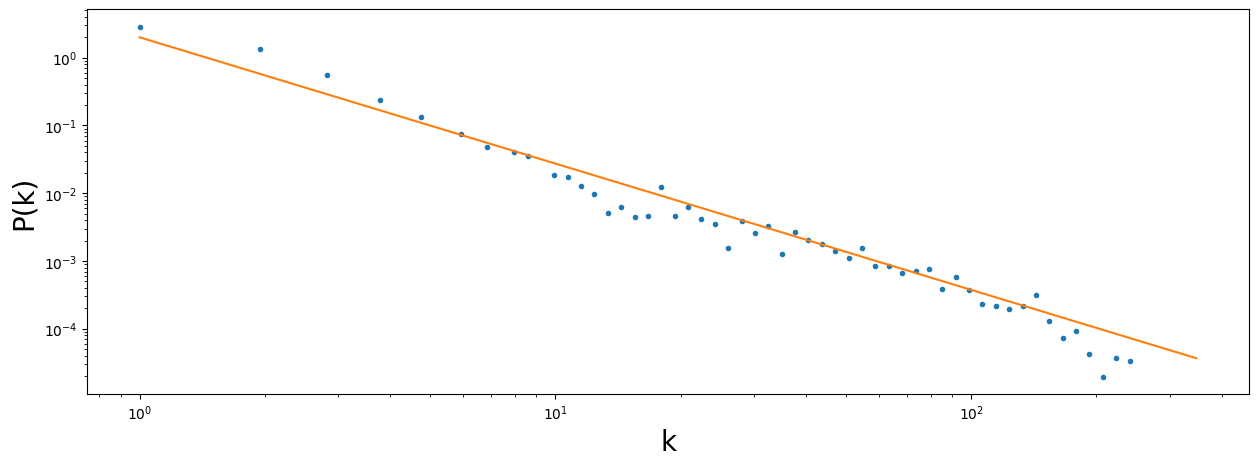

In [ ]:
y1,x1 = np.histogram(df.Degree.values, bins = np.logspace(0, np.log10(int(K)+100), 80), density= 1)

plt.figure(figsize = [15,5])
plt.plot(x1[:-1], y1, '.')
plt.plot(x1[:], 2*x1**(-fit.alpha))

plt.xscale('log')
plt.yscale('log')

plt.xlabel('k', size = 20)
plt.ylabel('P(k)', size = 20)

### Conclusiones
A partir de las comparaciones de ambos modelos, se puede decir del fenómeno que estamos analizando que las conexiones entre aeropuertos no son aleatorias, al tener independencia de escala nos indica que tienen enlaces preferenciales. Si un aeropuerto esta conectado con una con un grado mayor, su exito puedo aumentar.

## Proceso
En este apartado se aplica el proceso de caminata aleatoria a los aeropuertos de México.

#Caminata Aleatoria

In [ ]:
df2[df2[" country"] == "Mexico"]

,id,name,city,country,IATA/FAA,ICAO,latitude,longitude,altitude,timezone,DST,_pos
# index,,,,,,,,,,,,
804,1783,General Juan N Alvarez International Airport,Acapulco,Mexico,ACA,MMAA,16.757099,-99.753998,16,-6.0,S,"array([6.10298054, 1.03169841])"
805,1785,Jesús Terán Paredo International Airport,Aguascalientes,Mexico,AGU,MMAS,21.705601,-102.318001,6112,-6.0,S,"array([6.09694662, 1.06962833])"
806,1786,Bahías de Huatulco International Airport,Huatulco,Mexico,HUX,MMBT,15.775300,-96.262604,464,-6.0,S,"array([6.09598477, 1.01424728])"
807,1789,Ciudad del Carmen International Airport,Ciudad Del Carmen,Mexico,CME,MMCE,18.653700,-91.799004,10,-6.0,S,"array([6.07988607, 1.00782479])"
808,1792,Bachigualato Federal International Airport,Culiacan,Mexico,CUL,MMCL,24.764500,-107.474998,108,-7.0,S,"array([6.11339036, 1.04956016])"
809,1793,Chetumal International Airport,Chetumal,Mexico,CTM,MMCM,18.504700,-88.326797,39,-5.0,S,"array([6.14657158, 0.95262249])"
810,1794,Ciudad Obregón International Airport,Ciudad Obregon,Mexico,CEN,MMCN,27.392599,-109.833000,243,-7.0,S,"array([6.11621632, 1.02129677])"
811,1795,Ingeniero Alberto Acuña Ongay International Ai...,Campeche,Mexico,CPE,MMCP,19.816799,-90.500298,34,-6.0,S,"array([6.12700707, 0.99372035])"
812,1796,Abraham González International Airport,Ciudad Juarez,Mexico,CJS,MMCS,31.636101,-106.429001,3904,-7.0,S,"array([6.11133463, 1.03869562])"


In [ ]:
J = nx.Graph()
for g in df2[df2[" country"] == "Mexico"].index:

  for j in df1[df1["# source"] == g][" target"]:
    for k in df2[df2[" country"] == "Mexico"].index:
      if j == k:
        J.add_edge( g, j)
        break

In [ ]:
dic = {}
for nodo in J.nodes:
  dic[nodo] = [df2[" longitude"][nodo], df2[" latitude"][nodo]]

In [ ]:
from tqdm import tqdm

In [ ]:
df2.loc[832]

 id                                                     1824
 name         Licenciado Benito Juarez International Airport
 city                                            Mexico City
 country                                              Mexico
 IATA/FAA                                                MEX
 ICAO                                                   MMMX
 latitude                                            19.4363
 longitude                                        -99.072098
 altitude                                               7316
 timezone                                               -6.0
 DST                                                       S
 _pos                        array([6.06770746, 1.06799682])
Name: 832, dtype: object

In [ ]:
tamañosMexico = np.array( [ J.degree(nodo) for nodo in J ] )

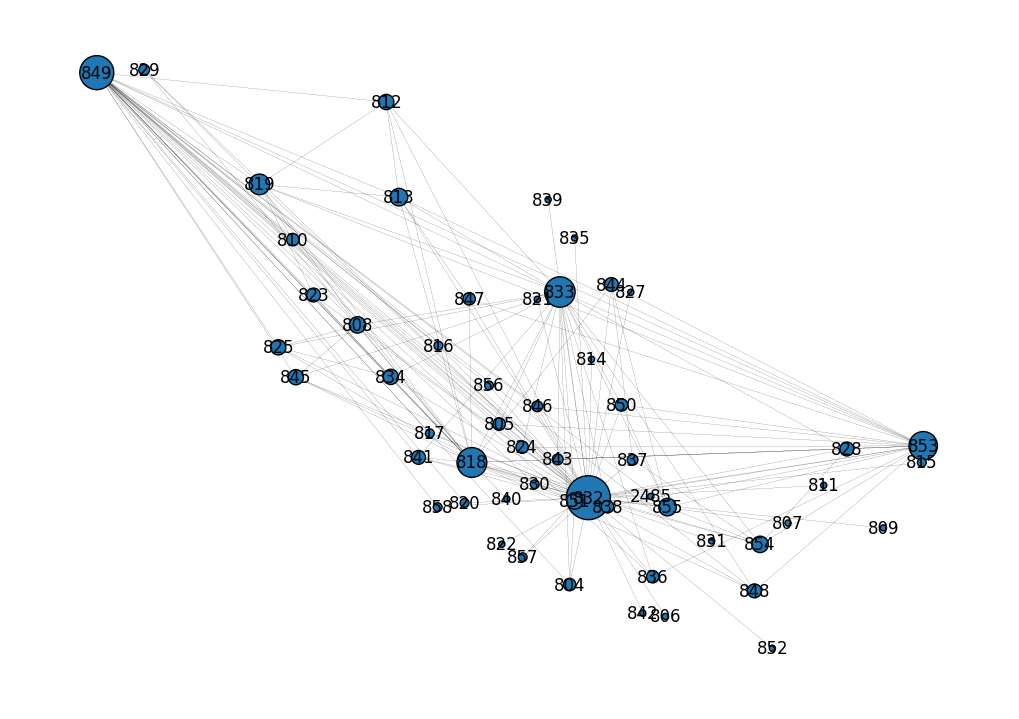

In [ ]:
nx.draw(J, pos = dic, with_labels = 1, node_size = tamañosMexico*20, edgecolors = "k", width = 0.1)

In [ ]:
T = np.zeros([len(J), len(J)])

Nodo1 = 0
Nodo2 = 0

for inicial in tqdm(J):
  for objetivo in J:
    tiempos = []

    for i in range(100):
      estado = inicial
      t = 0
      while True:
        t+=1
        estado = np.random.choice(J[estado])
        if estado == objetivo:break
      tiempos.append(t)
    T[Nodo1, Nodo2] = np.mean(tiempos)
    Nodo2 += 1

  Nodo1 += 1
  Nodo2 = 0

100%|██████████| 55/55 [11:31<00:00, 12.58s/it]


In [ ]:
import seaborn as sns

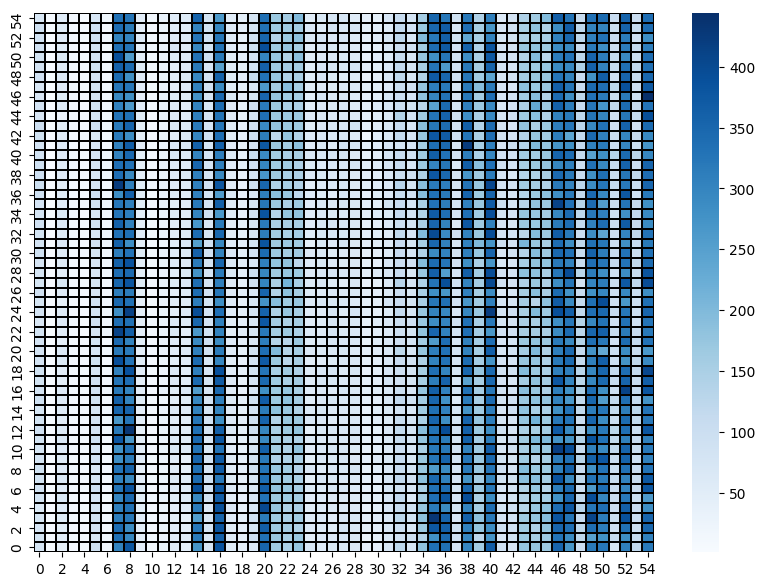

In [ ]:
sns.heatmap(T, cmap = "Blues", linewidths = 0.01, linecolor = "k"  )

plt.axis([0, 55, 0, 55])

plt.show()

#Aeropuertos con mayor accesibilidad con viajes al azar

In [ ]:
colores = T.mean(axis = 0)**(-1.)

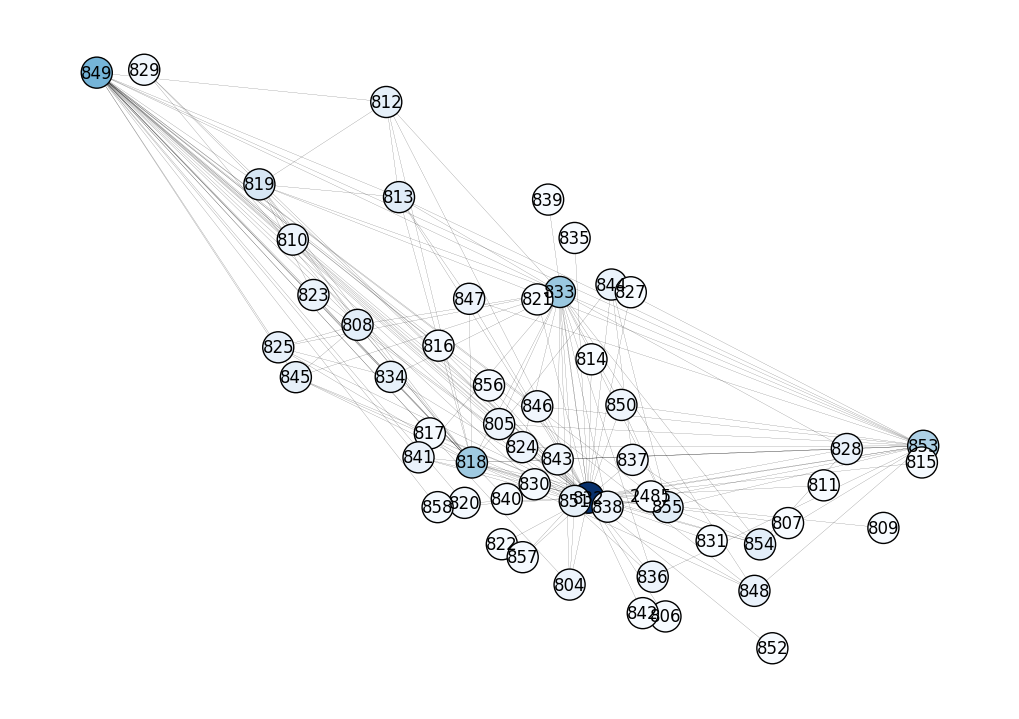

In [ ]:
nx.draw(J, pos = dic, edgecolors = "k", node_color = colores, node_size = 500, cmap = "Blues", width = 0.1, with_labels = 1)

In [ ]:
print("Mayor accesibilidad:")
print(df2.loc[832][" city"])
print(df2.loc[818][" city"])
print(df2.loc[833][" city"])
print(df2.loc[849][" city"])
print(df2.loc[853][" city"])

Mayor accesibilidad:
Mexico City
Guadalajara
Monterrey
Tijuana
Cancun


In [ ]:
colores = T.mean(axis = 1)**(-1.)

Aeropuertos con mayor facilidad de llegar a otros con viajes al azar

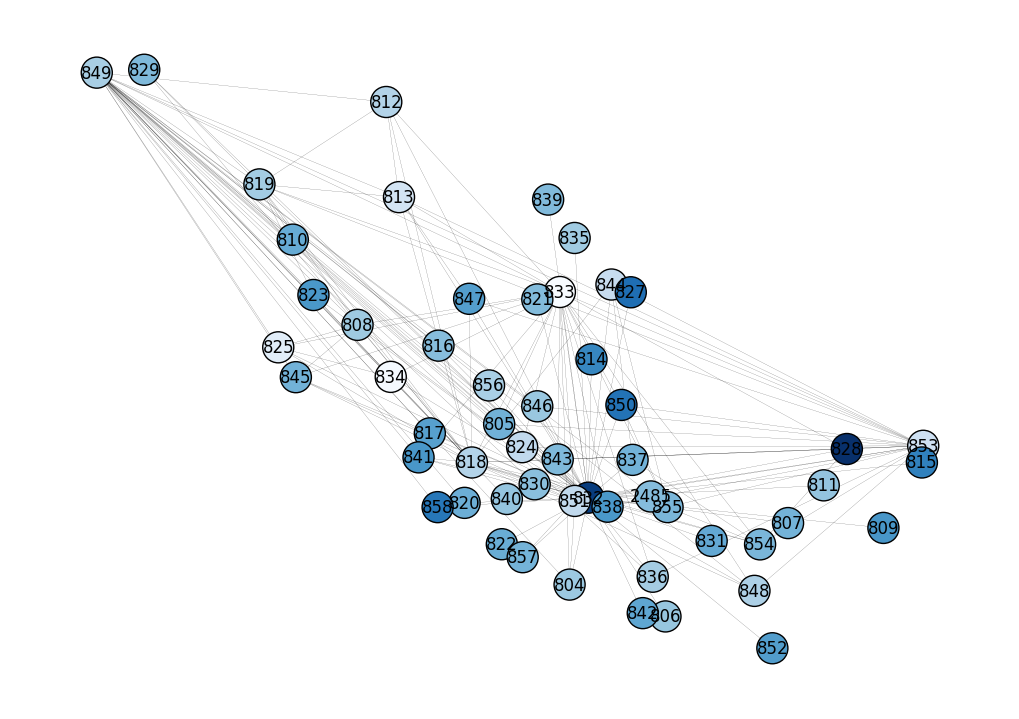

In [ ]:
nx.draw(J, pos = dic, edgecolors = "k", node_color = colores, node_size = 500, cmap = "Blues", width = 0.1, with_labels = 1)

In [ ]:
print("Aeropuerto con mayor facilidad:")
print(df2.loc[832][" city"])
print(df2.loc[828][" city"])
print("Aeropuerto con menor facilidad:")
print(df2.loc[833][" city"])
print(df2.loc[834][" city"])

Aeropuerto con mayor facilidad:
Mexico City
Merida
Aeropuerto con menor facilidad:
Monterrey
Mazatlan


### Interpretación
¿Qué pueden concluir a partir de la simulación? Es una red robusta, está bien conectada, etc.

A partir de la simulación se puede concluir que si las aeronaves siguieran una caminata aleatorio entre los aeropuertos de México, entonces lo mas probable es que terminen en la Ciudad de México, Guadalajara, Monterrey, Cancun o Tijuana.

## Conclusión

A partir del análisis se puede decir que la red de aeropuertos en el mundo tiene enlaces preferenciales, a los aeropuertos con pocos nodos les conviene conectarse con los aeropuertos donde mas viajes ocurren. De esta manera puede mejorar el exito de un aeropuerto.